In [3]:
import pandas as pd

df = pd.read_csv(r"C:\Ibrahim\Personal\University Stuff\Machine Learning\Project\ML Irrigation Project\data\raw\Rain_fall_in_Pakistan.csv")

In [4]:
df.head()

,date,adm2_id,ADM2_PCODE,n_pixels,rfh,rfh_avg,r1h,r1h_avg,r3h,r3h_avg,rfq,r1q,r3q,version
0,#date,#adm2+id,#adm2+code,#indicator+n_pixels+num,#indicator+rfh+num,#indicator+rfh_avg+num,#indicator+r1h+num,#indicator+r1h_avg+num,#indicator+r3h+num,#indicator+r3h_avg+num,#indicator+rfq+pct,#indicator+r1q+pct,#indicator+r3q+pct,#status
1,1981-01-01,1009036,PK401,36.0,33.9444,20.9926,NaN,NaN,NaN,NaN,149.829,NaN,NaN,final
2,1981-01-11,1009036,PK401,36.0,7.9167,21.4537,NaN,NaN,NaN,NaN,48.8274,NaN,NaN,final
3,1981-01-21,1009036,PK401,36.0,95.9167,29.4389,137.7778,71.8852,NaN,NaN,293.0311,180.4695,NaN,final
4,1981-02-01,1009036,PK401,36.0,52.1667,33.8259,156.0,84.7185,NaN,NaN,147.2384,175.2561,NaN,final


In [5]:
#removing the meta-data row
df = df.iloc[1:].copy()

df.head()

,date,adm2_id,ADM2_PCODE,n_pixels,rfh,rfh_avg,r1h,r1h_avg,r3h,r3h_avg,rfq,r1q,r3q,version
1,1981-01-01,1009036,PK401,36.0,33.9444,20.9926,NaN,NaN,NaN,NaN,149.829,NaN,NaN,final
2,1981-01-11,1009036,PK401,36.0,7.9167,21.4537,NaN,NaN,NaN,NaN,48.8274,NaN,NaN,final
3,1981-01-21,1009036,PK401,36.0,95.9167,29.4389,137.7778,71.8852,NaN,NaN,293.0311,180.4695,NaN,final
4,1981-02-01,1009036,PK401,36.0,52.1667,33.8259,156.0,84.7185,NaN,NaN,147.2384,175.2561,NaN,final
5,1981-02-11,1009036,PK401,36.0,17.3889,33.8713,165.4722,97.1361,NaN,NaN,57.5975,163.7844,NaN,final


In [6]:
#making sure that date column has actual dates
df['date'] = pd.to_datetime(df['date'], errors='coerce')

df.head()

,date,adm2_id,ADM2_PCODE,n_pixels,rfh,rfh_avg,r1h,r1h_avg,r3h,r3h_avg,rfq,r1q,r3q,version
1,1981-01-01,1009036,PK401,36.0,33.9444,20.9926,NaN,NaN,NaN,NaN,149.829,NaN,NaN,final
2,1981-01-11,1009036,PK401,36.0,7.9167,21.4537,NaN,NaN,NaN,NaN,48.8274,NaN,NaN,final
3,1981-01-21,1009036,PK401,36.0,95.9167,29.4389,137.7778,71.8852,NaN,NaN,293.0311,180.4695,NaN,final
4,1981-02-01,1009036,PK401,36.0,52.1667,33.8259,156.0,84.7185,NaN,NaN,147.2384,175.2561,NaN,final
5,1981-02-11,1009036,PK401,36.0,17.3889,33.8713,165.4722,97.1361,NaN,NaN,57.5975,163.7844,NaN,final


In [ ]:
#convert numeric columns into safe numeric columns

numeric_cols = df.columns.drop(['date', 'adm2_id', 'ADM2_PCODE', 'version'])

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

#errors='coerce'
#if a val cant be converted into a number, turn it into NaN instead of throwing an error.
    
df.head()

,date,adm2_id,ADM2_PCODE,n_pixels,rfh,rfh_avg,r1h,r1h_avg,r3h,r3h_avg,rfq,r1q,r3q,version
1,1981-01-01,1009036,PK401,36.0,33.9444,20.9926,NaN,NaN,NaN,NaN,149.8290,NaN,NaN,final
2,1981-01-11,1009036,PK401,36.0,7.9167,21.4537,NaN,NaN,NaN,NaN,48.8274,NaN,NaN,final
3,1981-01-21,1009036,PK401,36.0,95.9167,29.4389,137.7778,71.8852,NaN,NaN,293.0311,180.4695,NaN,final
4,1981-02-01,1009036,PK401,36.0,52.1667,33.8259,156.0000,84.7185,NaN,NaN,147.2384,175.2561,NaN,final
5,1981-02-11,1009036,PK401,36.0,17.3889,33.8713,165.4722,97.1361,NaN,NaN,57.5975,163.7844,NaN,final


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47070 entries, 1 to 47070
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        47070 non-null  datetime64[ns]
 1   adm2_id     47070 non-null  object        
 2   ADM2_PCODE  47070 non-null  object        
 3   n_pixels    47070 non-null  float64       
 4   rfh         47070 non-null  float64       
 5   rfh_avg     47070 non-null  float64       
 6   r1h         47010 non-null  float64       
 7   r1h_avg     47010 non-null  float64       
 8   r3h         46830 non-null  float64       
 9   r3h_avg     46830 non-null  float64       
 10  rfq         47070 non-null  float64       
 11  r1q         47010 non-null  float64       
 12  r3q         46830 non-null  float64       
 13  version     47070 non-null  object        
dtypes: datetime64[ns](1), float64(10), object(3)
memory usage: 5.0+ MB


In [9]:
df.shape

(47070, 14)

In [10]:
n_missing = df.isna().sum()

n_missing

date            0
adm2_id         0
ADM2_PCODE      0
n_pixels        0
rfh             0
rfh_avg         0
r1h            60
r1h_avg        60
r3h           240
r3h_avg       240
rfq             0
r1q            60
r3q           240
version         0
dtype: int64

In [11]:
#date range
df['date'].min(), df['date'].max()

(Timestamp('1981-01-01 00:00:00'), Timestamp('2024-07-21 00:00:00'))

In [12]:
#number of regions
df['adm2_id'].nunique()

30

In [13]:
#checking the time frequency

df.groupby(df['date'].dt.date).size().head(15)

date
1981-01-01    30
1981-01-11    30
1981-01-21    30
1981-02-01    30
1981-02-11    30
1981-02-21    30
1981-03-01    30
1981-03-11    30
1981-03-21    30
1981-04-01    30
1981-04-11    30
1981-04-21    30
1981-05-01    30
1981-05-11    30
1981-05-21    30
dtype: int64

the data is collected/stored every 10 days.

like DEKAD data, the standard climate data frequency, used by FAO, WSP, NASA

In [14]:
#region list
df['adm2_id'].unique()

array(['1009036', '1009035', '1009034', '1009027', '1009028', '1009029',
       '1009032', '1009031', '1009011', '1009030', '1009006', '1009007',
       '1009008', '1009009', '1009010', '1009012', '1009013', '1009015',
       '1009016', '1009014', '1009018', '1009019', '1009020', '1009021',
       '1009022', '1009023', '1009024', '1009025', '1009026', '1009017'],
      dtype=object)

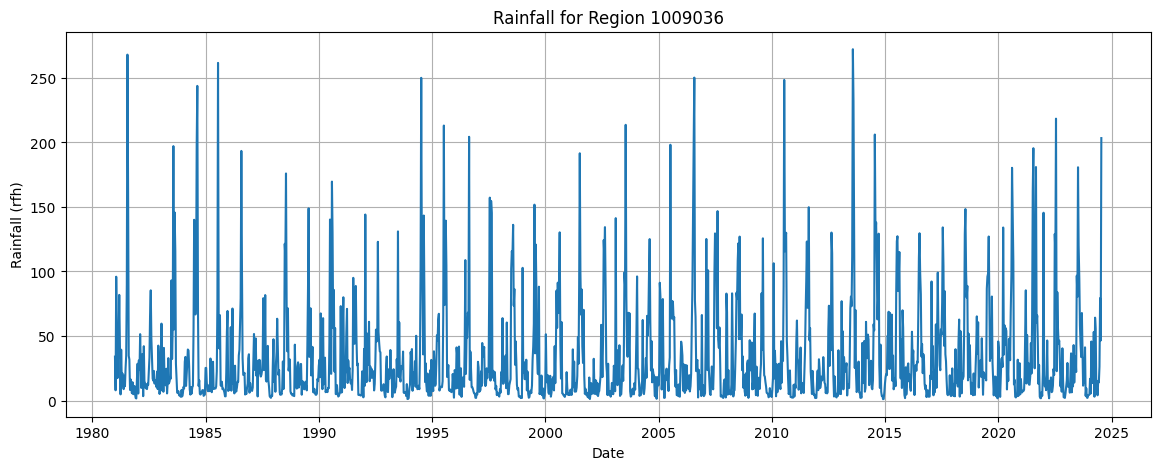

In [16]:
import matplotlib.pyplot as plt

region_id = "1009036"

df_region = df[df['adm2_id'] == region_id]

plt.figure(figsize=(14,5))
plt.plot(df_region['date'], df_region['rfh'])
plt.title(f"Rainfall for Region {region_id}")
plt.xlabel("Date")
plt.ylabel("Rainfall (rfh)")
plt.grid(True)
plt.show()

In [17]:
df['adm2_id'].value_counts()

adm2_id
1009036    1569
1009035    1569
1009034    1569
1009027    1569
1009028    1569
1009029    1569
1009032    1569
1009031    1569
1009011    1569
1009030    1569
1009006    1569
1009007    1569
1009008    1569
1009009    1569
1009010    1569
1009012    1569
1009013    1569
1009015    1569
1009016    1569
1009014    1569
1009018    1569
1009019    1569
1009020    1569
1009021    1569
1009022    1569
1009023    1569
1009024    1569
1009025    1569
1009026    1569
1009017    1569
Name: count, dtype: int64

In [19]:
df_region = df[df['adm2_id'] == "1009036"]

df_region.head(10)

,date,adm2_id,ADM2_PCODE,n_pixels,rfh,rfh_avg,r1h,r1h_avg,r3h,r3h_avg,rfq,r1q,r3q,version
1,1981-01-01,1009036,PK401,36.0,33.9444,20.9926,NaN,NaN,NaN,NaN,149.8290,NaN,NaN,final
2,1981-01-11,1009036,PK401,36.0,7.9167,21.4537,NaN,NaN,NaN,NaN,48.8274,NaN,NaN,final
3,1981-01-21,1009036,PK401,36.0,95.9167,29.4389,137.7778,71.8852,NaN,NaN,293.0311,180.4695,NaN,final
4,1981-02-01,1009036,PK401,36.0,52.1667,33.8259,156.0000,84.7185,NaN,NaN,147.2384,175.2561,NaN,final
5,1981-02-11,1009036,PK401,36.0,17.3889,33.8713,165.4722,97.1361,NaN,NaN,57.5975,163.7844,NaN,final
6,1981-02-21,1009036,PK401,36.0,37.0833,18.9009,106.6389,86.5981,NaN,NaN,176.0741,120.7465,NaN,final
7,1981-03-01,1009036,PK401,36.0,45.7222,21.6231,100.1944,74.3954,NaN,NaN,190.5193,130.5693,NaN,final
8,1981-03-11,1009036,PK401,36.0,81.8333,24.9417,164.6389,65.4657,NaN,NaN,290.0083,231.4148,NaN,final
9,1981-03-21,1009036,PK401,36.0,41.9167,27.4315,169.4722,73.9963,413.8889,232.4796,144.6640,213.6668,174.8142,final
10,1981-04-01,1009036,PK401,36.0,4.7500,27.6361,128.5000,80.0093,384.6944,239.1231,29.8749,153.8731,158.4335,final


In [20]:
region_lengths = df.groupby("adm2_id")["date"].count().sort_values()

region_lengths

adm2_id
1009006    1569
1009007    1569
1009008    1569
1009009    1569
1009010    1569
1009011    1569
1009012    1569
1009013    1569
1009014    1569
1009015    1569
1009016    1569
1009017    1569
1009018    1569
1009019    1569
1009020    1569
1009021    1569
1009022    1569
1009023    1569
1009024    1569
1009025    1569
1009026    1569
1009027    1569
1009028    1569
1009029    1569
1009030    1569
1009031    1569
1009032    1569
1009034    1569
1009035    1569
1009036    1569
Name: date, dtype: int64

In [21]:
df['year'] = df['date'].dt.year
df['dekad'] = df['date'].dt.day

df.groupby("adm2_id")["date"].nunique().sort_values()

adm2_id
1009006    1569
1009007    1569
1009008    1569
1009009    1569
1009010    1569
1009011    1569
1009012    1569
1009013    1569
1009014    1569
1009015    1569
1009016    1569
1009017    1569
1009018    1569
1009019    1569
1009020    1569
1009021    1569
1009022    1569
1009023    1569
1009024    1569
1009025    1569
1009026    1569
1009027    1569
1009028    1569
1009029    1569
1009030    1569
1009031    1569
1009032    1569
1009034    1569
1009035    1569
1009036    1569
Name: date, dtype: int64

In [22]:
(df[numeric_cols] < 0).sum()

n_pixels    0
rfh         0
rfh_avg     0
r1h         0
r1h_avg     0
r3h         0
r3h_avg     0
rfq         0
r1q         0
r3q         0
dtype: int64

In [ ]:
#rfh: rainfall amount(in millimeters) in the current hour.
df["rfh"].describe()

count    47070.000000
mean        10.668433
std         17.732055
min          0.000000
25%          1.423125
50%          3.900750
75%         11.969475
max        272.194400
Name: rfh, dtype: float64

In [24]:
df.groupby("adm2_id")["rfh"].describe()

,count,mean,std,min,25%,50%,75%,max
adm2_id,,,,,,,,
1009006,1569.0,4.834723,8.882885,0.1330,1.0435,1.8348,3.8951,93.1061
1009007,1569.0,11.773029,14.071583,0.4431,2.7186,6.5449,15.4970,141.4491
1009008,1569.0,8.751497,11.548812,0.4265,2.1499,4.6225,10.6398,139.1412
1009009,1569.0,6.298797,8.526145,0.0998,1.7669,3.5632,6.8646,99.1905
1009010,1569.0,5.589293,14.536419,0.0000,1.0000,1.5954,3.5038,194.5954
1009011,1569.0,3.127641,4.186551,0.1458,0.9018,1.9054,3.4734,42.5031
1009012,1569.0,13.878323,12.562374,1.1453,5.4816,9.9428,17.8023,101.4302
1009013,1569.0,8.081141,10.903350,0.4845,1.5613,4.0000,9.0945,99.7194
1009014,1569.0,20.065504,27.758579,1.0105,3.4232,8.5994,23.6898,185.8343


<Axes: title={'center': 'average seasonal rainfall pattern'}, xlabel='month'>

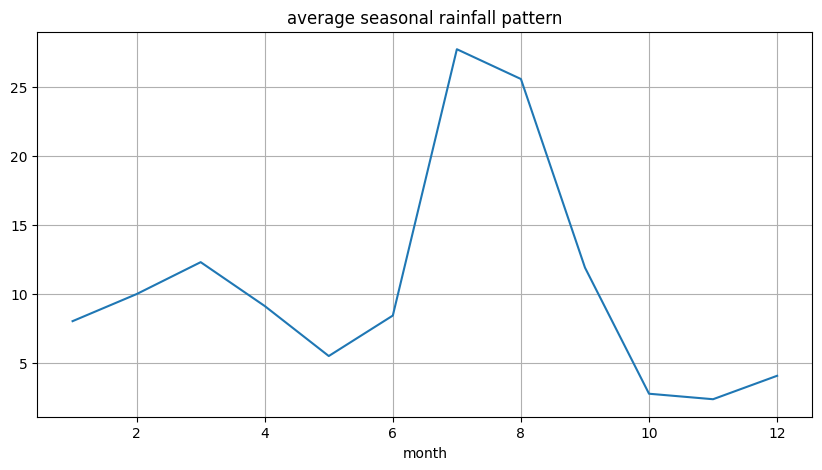

In [ ]:
#mean rainfall per month (even though data is dekad-based)
#average rainfall for each month across ALL years (1981–2024)
df["month"] = df["date"].dt.month
monthly_pattern = df.groupby("month")["rfh"].mean()
monthly_pattern.plot(kind="line", figsize=(10,5), grid=True, title="average seasonal rainfall pattern")

the graph shows:
- dry winter
- sharply increasing rainfall before monsoon
- peak in July–August (monsoon)
- decline in September
- almost no rainfall in autumn/winter

this is the seasonality pattern the LSTM will have to learn.

In [ ]:
n_missing = df.isna().sum()
n_missing

date            0
adm2_id         0
ADM2_PCODE      0
n_pixels        0
rfh             0
rfh_avg         0
r1h            60
r1h_avg        60
r3h           240
r3h_avg       240
rfq             0
r1q            60
r3q           240
version         0
year            0
dekad           0
month           0
dtype: int64

In [27]:
region_lengths = df.groupby("adm2_id")["date"].count().sort_values()
region_lengths

adm2_id
1009006    1569
1009007    1569
1009008    1569
1009009    1569
1009010    1569
1009011    1569
1009012    1569
1009013    1569
1009014    1569
1009015    1569
1009016    1569
1009017    1569
1009018    1569
1009019    1569
1009020    1569
1009021    1569
1009022    1569
1009023    1569
1009024    1569
1009025    1569
1009026    1569
1009027    1569
1009028    1569
1009029    1569
1009030    1569
1009031    1569
1009032    1569
1009034    1569
1009035    1569
1009036    1569
Name: date, dtype: int64

In [28]:
unique_dates_per_region = df.groupby("adm2_id")["date"].nunique().sort_values()
unique_dates_per_region

adm2_id
1009006    1569
1009007    1569
1009008    1569
1009009    1569
1009010    1569
1009011    1569
1009012    1569
1009013    1569
1009014    1569
1009015    1569
1009016    1569
1009017    1569
1009018    1569
1009019    1569
1009020    1569
1009021    1569
1009022    1569
1009023    1569
1009024    1569
1009025    1569
1009026    1569
1009027    1569
1009028    1569
1009029    1569
1009030    1569
1009031    1569
1009032    1569
1009034    1569
1009035    1569
1009036    1569
Name: date, dtype: int64

In [29]:
years_per_region = df.groupby("adm2_id")["year"].nunique().sort_values()
years_per_region

adm2_id
1009006    44
1009007    44
1009008    44
1009009    44
1009010    44
1009011    44
1009012    44
1009013    44
1009014    44
1009015    44
1009016    44
1009017    44
1009018    44
1009019    44
1009020    44
1009021    44
1009022    44
1009023    44
1009024    44
1009025    44
1009026    44
1009027    44
1009028    44
1009029    44
1009030    44
1009031    44
1009032    44
1009034    44
1009035    44
1009036    44
Name: year, dtype: int64

In [30]:
df[df['r3h'].isna()]['adm2_id'].value_counts()

adm2_id
1009036    8
1009035    8
1009034    8
1009027    8
1009028    8
1009029    8
1009032    8
1009031    8
1009011    8
1009030    8
1009006    8
1009007    8
1009008    8
1009009    8
1009010    8
1009012    8
1009013    8
1009015    8
1009016    8
1009014    8
1009018    8
1009019    8
1009020    8
1009021    8
1009022    8
1009023    8
1009024    8
1009025    8
1009026    8
1009017    8
Name: count, dtype: int64

In [31]:
df[df['r1h'].isna()]['adm2_id'].value_counts()

adm2_id
1009036    2
1009035    2
1009034    2
1009027    2
1009028    2
1009029    2
1009032    2
1009031    2
1009011    2
1009030    2
1009006    2
1009007    2
1009008    2
1009009    2
1009010    2
1009012    2
1009013    2
1009015    2
1009016    2
1009014    2
1009018    2
1009019    2
1009020    2
1009021    2
1009022    2
1009023    2
1009024    2
1009025    2
1009026    2
1009017    2
Name: count, dtype: int64

- interpolation fills gaps within the dataset (most accurate).

- **ffill()** fills the very first missing value (if it existed).

- **bfill()** fills the very last missing value (edge case).

- the order **.ffill().bfill()** ensures no gaps remain.

In [32]:
cols_with_missing_vals = ['r1h', 'r1h_avg', 'r3h', 'r3h_avg', 'r1q', 'r3q']
for col in cols_with_missing_vals:
    df[col] = df[col].interpolate(method='linear')

In [34]:
#forward fill then backward fill for edge cases
df[cols_with_missing_vals] = df[cols_with_missing_vals].ffill().bfill()

In [35]:
df[cols_with_missing_vals].isna().sum()

r1h        0
r1h_avg    0
r3h        0
r3h_avg    0
r1q        0
r3q        0
dtype: int64

<Axes: title={'center': 'annual total rainfall for region 1009036'}, xlabel='date'>

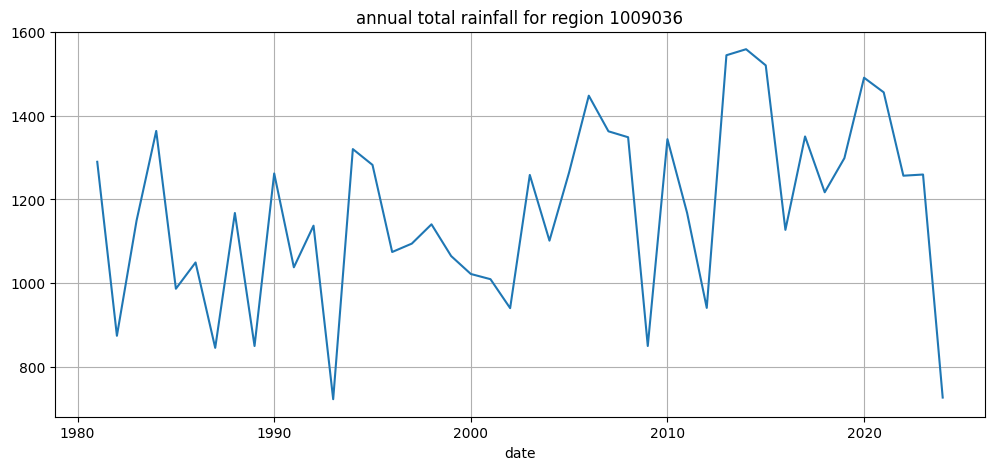

In [36]:
#annual rainfall trend for one region
region_id = "1009036"
df_region = df[df['adm2_id'] == region_id]
annual_rainfall = df_region.groupby(df_region['date'].dt.year)['rfh'].sum()

annual_rainfall.plot(figsize=(12,5), title=f"annual total rainfall for region {region_id}", grid=True)

- strong year-to-year variability (normal for monsoon regions).
- no clear linear increase or decrease.
- some very high rainfall years (peaks around 2010–2015).
- noticeable dip in the last year (could be incomplete data for 2024).

C:\Users\ibrah\AppData\Local\Temp\ipykernel_4692\1448870923.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['month'] = df_region['date'].dt.month


<Axes: title={'center': 'monthly rainfall pattern - region 1009036'}, xlabel='month'>

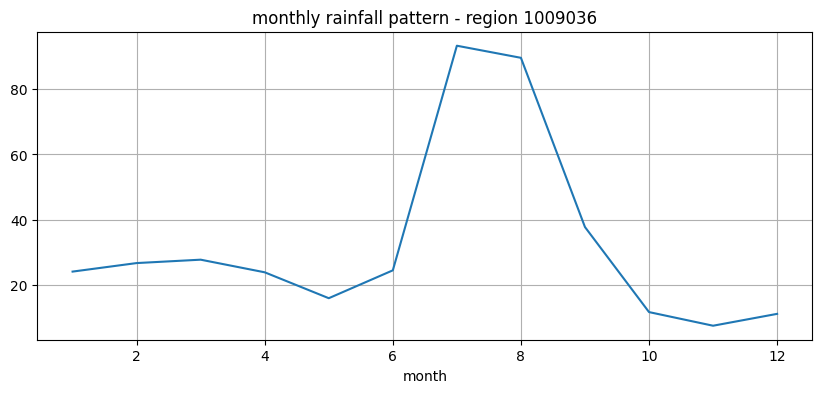

In [37]:
#monthly/seasonal pattern
df_region['month'] = df_region['date'].dt.month
monthly_pattern_region = df_region.groupby('month')['rfh'].mean()
monthly_pattern_region.plot(figsize=(10,4), title=f"monthly rainfall pattern - region {region_id}", grid=True)

- very strong seasonality.
- low rainfall from October → May.
- sharp increase beginning in June, peaking in July–August.
- classic monsoon pattern.

<Axes: title={'center': 'rainfall outlier check'}>

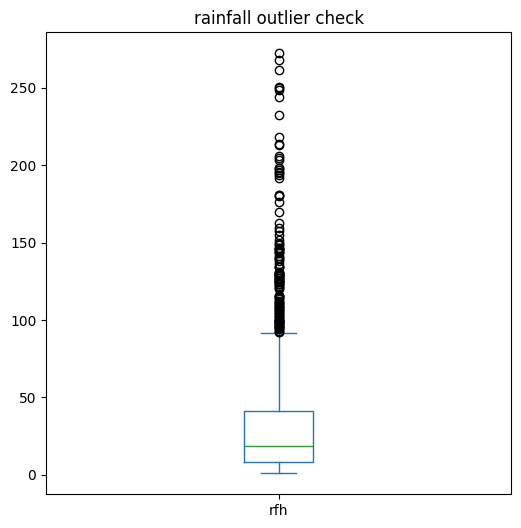

In [39]:
#checking for outliers
df_region['rfh'].plot(kind='box', figsize=(6,6), title="rainfall outlier check")

- many outliers above 100 mm.
- dense cluster around 0–40 mm.
- this is normal as rainfall is highly skewed.
- no suspicious anomalies, just natural heavy rainfall events.

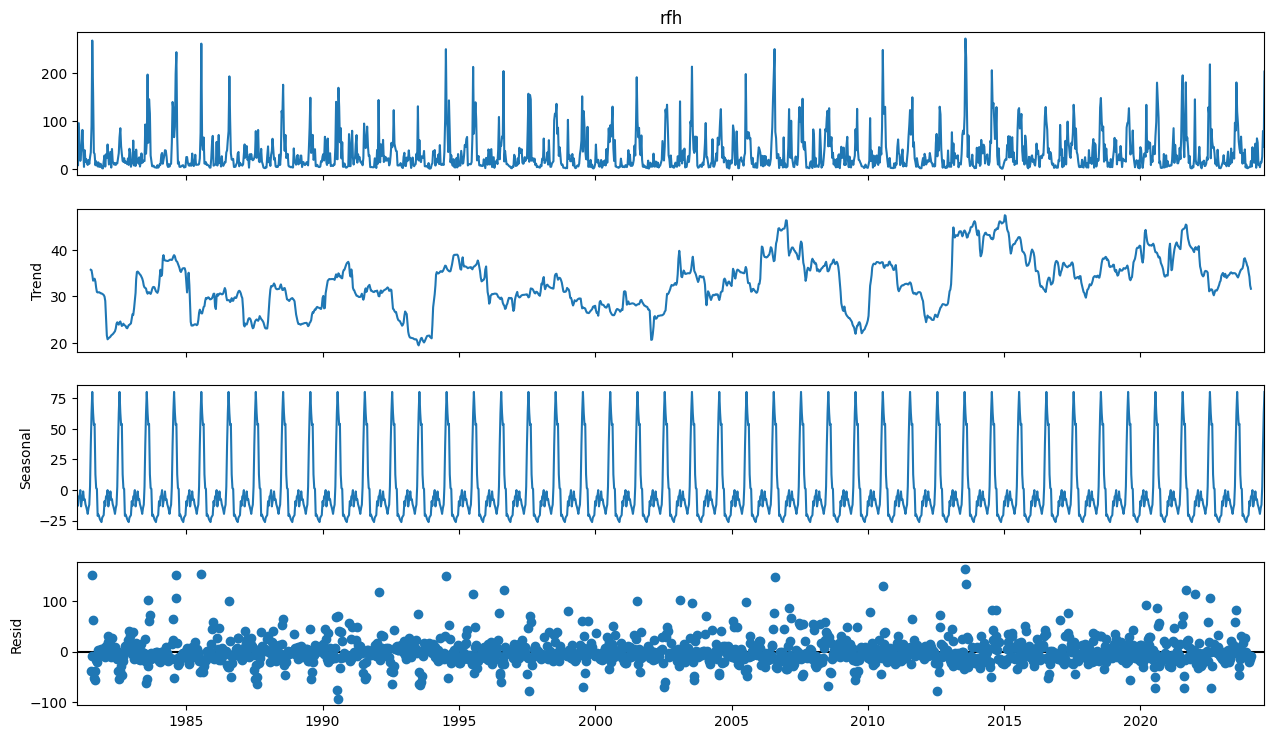

In [41]:
#time-series decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

df_region_ts = df_region.set_index('date')['rfh']

decomposition = seasonal_decompose(df_region_ts, model='additive', period=36) #36 dekads => 1 year

fig = decomposition.plot()
fig.set_size_inches(14, 8)
plt.show()

**observed series:**
- regular peaks every year
- natural noise
- no sudden data quality issues

**trend component:**
- long-term slow undulation
- no sharp artificial jumps
- data is stable enough for forecasting

**seasonal component:**
- extremely clean and repeated pattern
- peaks at the exact same dekads every year
- strong periodic signal (ideal for LSTM)

**residual component:**
- mostly random
- no systematic drift
- no abnormal structure